# RooFit Tutorial
## Fit Cosmological Models to Type 1a Supernova Data
### Created:  Summer 2017 Harrison B. Prosper
#### Updated: October 2019, Bari, Italy
## Introduction
In this tutorial, you will learn how to use the probability modeling package __[RooFit](https://root.cern.ch/roofit-20-minutes)__, released with the CERN data analysis package __[ROOT](http://root.cern.ch)__, to perform simple fits of cosmological models to Type 1a supernova data. 

 >__Prerequisite__: some familiarity with __[Python](http://www.python.org)__ and __[ROOT](http://root.cern.ch)__ is helpful.


A __[Type Ia supernova](https://en.wikipedia.org/wiki/Type_Ia_supernova)__ is thought to be the thermonuclear detonation of a carbon-oxygen white dwarf whose mass has reached the __[Chandrasekhar limit](https://en.wikipedia.org/wiki/Chandrasekhar_limit)__ of about 1.4 times the mass of the Sun. Beyond that mass limit, the pressure of the electron gas due to the Pauli exclusion principle is insufficient to keep the white dwarf stable. The favored model of Type Ia supernovae is a binary system in which a white dwarf accretes hydrogen from its red giant partner until the white dwarf reaches the point of thermonuclear instability. The fact that roughly the same mass explodes each time, namely 1.4 solar masses, which makes the explosions immensely luminous, makes Type 1a supernovae excellent markers for measuring cosmological distances. While there is some variation in the luminosity of these explosions, it turns out that through a simple empirical procedure it is possible to convert these explosions into __standard candles__. Given a standard candle, that is, a system of known luminosity and therefore known intrinsic brightness, and given the system's apparent brightness, the inverse square law can be used to infer the distance to the system. If we can determine the distance and redshift $z = (\lambda_o - \lambda_e)/ \lambda_e$ for many Type 1a supernovae, we can use these data to infer the parameters of cosmological models. The observed wavelength $\lambda_o$ is readily measured, while the emitted wavelength $\lambda_e$, that is, the wavelength of the light emitted by the supernova in its rest frame, can be inferred by identifying the known spectral lines of the excited atoms and molecules.

Current cosmological models of the universe are based on the __1st Friedmann equation__,
\begin{equation}
\left(\frac{\dot{a}}{a} \right)^2 = \frac{8\pi G}{3}\rho(a) - \frac{K c^2}{a^2} + \frac{\Lambda c^2}{3},
\end{equation}
and the __Friedmann-Lemaitre-Robertson-Walker__ (FLRW) metric
\begin{equation}
    ds^2 = (c dt)^2 - a^2(t)\left[ \frac{dr^2}{1 - Kr^2} + r^2 (d\theta^2 + \sin^2\theta \, d\phi^2) \right],
\end{equation}
where $a(t)$ is a dimensionless function, called the __scale factor__, that models how __proper distances__ change with cosmic time $t$. The proper distance is the spacetime separation between *simultaneous* events. By convention, the scale factor is normalized so that $a(t_0) = 1$ at the present epoch $t_0$, which is the elapsed time since the Big Bang, defined by $a(0) = 0$. $G$ is the gravitational constant, $c$ the speed of light in vacuum, $\dot{a} \equiv da/dt$, and $\rho c^2$ is the density of all forms of energy excluding that due to the cosmological constant $\Lambda$ or dark energy. The constant $K$, which has units of inverse area, is the global curvature of space. 

Care must be exercised in interpreting the symbols of any metric. For example, the radial coordinate $r$ is not the proper distance between the center of the sphere at $r = 0$ and the sphere! The operational meaning of the radial coordinate $r$ is simply $r = \sqrt{A \, / \, (4\pi)}$, where $A$ is the __proper area__ of the sphere centered at $r = 0$, *today*. The proper area is the area defined by a set of simultaneous events forming a 2-dimensional surface. The proper distance between any two nearby galaxies today, when by choice $a(t_0) = 1$, is the square root of the term in square brackets in the FLRW metric. The invariant distance, $|ds| = d\chi$, is called the __comoving distance__ because the coordinate grid that defines it expands with the universe. Therefore, if a galaxy is stationary with respect to this expanding grid, its comoving coordinates (relative to some origin) do not change. By choice, comoving distances match proper distances today; at any other cosmic time $t$, the proper distance between any two galaxies, which are not necessarily nearby, is given by 
    \begin{equation}
    d(t) = a(t) \, \chi.
    \end{equation}

The motion of galaxies relative to the comoving grid, the so-called __perculiar motion__, is small (roughly on the order of 200 km/s) compared with the speed of light. Therefore, on the scale of millions of years, it is a very good approximation to presume that the same time $t$ since the Big Bang can be assigned to all galaxies, that is, that all galaxies share the same surfaces of simultaneity. This is just as well, because it makes it possible to describe the evolution of the universe in a way that is not specific to our particular circumstance. Ironically, however, this is a highly non-relativistic way to conceptual spacetime. In principle, spacetime is to be regarded as a completed 4-dimensional *thing* that doesn't evolve; spacetime just is!

Let us calculate the comoving distance between a supernova placed at the origin of our coordinate system and the Milky Way galaxy, which is at spatial coordinates $(r, \, \theta, \, \phi)$. The comoving distance to be calculated lies along the radial direction, for which $d\theta = d\phi = 0$. Since, by choice, $a(t_0) = 1$ *today* and the comoving distance matches the proper distance, for which $dt = 0$, it follows from the FLRW metric that 
$$\chi = \int_0^r d\chi = \int_0^r \frac{dy}{\sqrt{1 - K y^2}} = \sin^{-1}(\sqrt{K} \, r) / \sqrt{K},$$
where, in order to avoid confusion, $y$ is used as the integration variable to distinguish it from its lower and upper bounds. The result can be inverted to give the coordinate distance
    \begin{equation}
    r = \sin(\sqrt{K}\chi)/\sqrt{K}, 
    \end{equation}
in terms of the comoving distance $\chi$.

## First Friedmann Equation
Consider the scaling law $d(t) = a(t) \, \chi$ and its derivative $\dot{d} = \dot{a} \, \chi$ with respect to the cosmic time $t$. If we interpret $v(t) = \dot{d}$ as the __proper velocity__ of the expansion, then we arrive at the general form of Hubble's law
$$v(t) = H(t) \, d(t),$$
where $H(t) = \dot{a} / a$ is called the __Hubble parameter__ and __Hubble's constant__ is, by definition, $H_0 = H(t_0)$. Therefore, the Friedmann equation at time $t_0$ is 
$$H_0^2 = \frac{8\pi G}{3}\rho(1) - K c^2 + \frac{\Lambda c^2}{3},$$
or, equivalently,
$$1 = \frac{8\pi G}{3H_0^2}\rho(1) - \frac{K c^2}{H_0^2} + \frac{\Lambda c^2}{3 H_0^2}.$$
Notice that each term on the right-hand side is dimensionless, suggesting that it might be useful to define the dimensionless functions 
\begin{eqnarray}
    \Omega_M(a) & = & \frac{8\pi G}{3H_0^2}\rho(a), \nonumber\\
    \Omega_K(a) & = & - \frac{K c^2}{H_0^2} \frac{1}{a^2}, \quad\textrm{and}\nonumber\\
    \Omega_\Lambda & = & \frac{\Lambda c^2}{3 H_0^2},
\end{eqnarray}
for arbitrary values of $a$. It is also useful to define
$\Omega(a)$ as the sum of these functions. Then, we can write the 1st Friedmann equation as
\begin{equation}
\dot{a} = H_0 a \sqrt{\Omega(a)}.
\end{equation}
Notice also that the quantities $\Omega_M(1)$, $\Omega_K(1)$, and $\Omega_\Lambda$ satisfy the sum rule
    \begin{equation}
    \Omega(1) = \Omega_M(1) + \Omega_K(1) + \Omega_\Lambda = 1,
    \end{equation}
irrespective of the cosmological model.

For simplicity, we shall take the dimensionless functions written *without* the dependence on $a$ to be the values of the functions evaluated at $a = 1$; for example, $\Omega_M$ is a synonym for $\Omega_M(1)$. The alternative convention is to append the subscript 0 to each symbol to denote its value today, e.g., $\Omega_{M0}$.


## Cosmological Models
For our purposes, a cosmological model is a mathematical description of how the dimensionless density $\Omega(a)$ in the model universe evolves with the scale factor $a$ together with dependence of the scale factor on the cosmic time $t$, obtained by solving the (1st) Friedmann equation $\dot{a} = H_0 a \sqrt{\Omega(a)}.$

In this tutorial, we consider two cosmological models, the standard model of cosmology $\Lambda\textrm{CDM}$ in which on every surface of simultanaeity (also known as 3-d space at a given time!) the model universe is filled with a homogeneous distribution of massless particles, a pressureless dust of galaxies, and a cosmological constant $\Lambda$. The second model (which I cooked up during an introductory class I taught on modern physics) is a phantom energy model in which I assume the validity of the Friedmann equation. 

### $\Lambda\textrm{CDM}$ Model
During most of the history of the universe, the energy density due to massless particles is negligible. Therefore, in a universe in which matter is conserved, we can write
$$\Omega_M(a) = \frac{\Omega_M}{a^3}.$$
This makes sense because if we double proper distances, we expect the matter density to go down by $2^3$. The $\Lambda\textrm{CDM}$ model is therefore defined by
\begin{equation}
\Omega(a) = \frac{\Omega_M}{a^3} + \frac{1 - \Omega_M - \Omega_\Lambda}{a^2} + \Omega_\Lambda,
\end{equation}
where $\Omega_M$, $\Omega_\Lambda$, and $H_0$ are the free parameters of the model.

### A Phantom Energy Model
This model is defined by
    \begin{equation}
    \Omega(a) = \frac{e^{a^n - 1}}{a^3},
    \end{equation}
and the parameters $n$ and $H_0$. Given the degeneracy inherent in the Friedmann equation, any model $\Omega(a)$ is consistent with infinitely many universes, each differing in content! For example, it is possible to regard the phantom energy model as one in which the phantom energy is coupled to matter in such a way that 
$$\Omega(a) = \frac{\Omega_M}{a^3} + \frac{e^{a^n - 1} - \Omega_M}{a^3}.$$
But, since neither the curvature parameter $\Omega_K$ nor the mass parameter $\Omega_M$ are identifiable in this model, we can choose their values at will. In particular, in order to be consistent with observations, we can choose  $\Omega_K = 0$ and $\Omega_M \approx 0.30$!
In phantom energy models energy appears in the vacuum out of nowhere, which would seem to violate a cherished principle. But is this really any stranger than the Big Bang itself? 

This phantom energy model can  be integrated exactly. We find
    \begin{equation}
    H_0 t = \sqrt{e} \, 2^{3/(2n)} \, \Gamma(3/(2n), \, a^n \, / \, 2) \, / \, n,
    \end{equation}
which exhibits a future singularity characterized by the condition $a \rightarrow \infty$ at a *finite* time. This singularity, dubbed a __Big Rip__, in which everything is stretched to infinite distances, occurs at
    \begin{equation}
    t_\textrm{rip} = \frac{1}{H_0}\sqrt{e} \, 2^{3/(2n)} \, \Gamma(3/(2n)) \, / \, n .
    \end{equation}
You can verify with this notebook that both the $\Lambda\textrm{CDM}$ and this phantom energy model  fit the supernova data equally well. 

The function $\Gamma(s, x) = \int_0^x \, t^{s - 1} \, e^{-t} \, dt$ is the 
__[incomplete gamma function](http://mathworld.wolfram.com/IncompleteGammaFunction.html)__.

## Distance Modulus
In a non-expanding universe, the energy flux $f$ from a supernova of luminosity $L$ (in watts), is given by the inverse square law, 
\begin{equation}
f = \frac{L}{4 \pi \, r^2}.
\end{equation}
However, in an expanding universe, the luminosity crossing a sphere of proper area $A = 4 \pi \, r^2$ is reduced by the factor $(1 + z)^2$; one factor of $(1 + z)$ arises from the reduction in a photon's energy by the time it reaches the sphere due to the expansion of the universe, and another factor arises from the lower rate at which photons arrive, again because of the expansion. Therefore, in an expanding universe the flux through the sphere today is given by 
\begin{equation}
f = \frac{L}{4 \pi \, d_L^2},
\end{equation}
where
\begin{eqnarray}
    d_L & = & (1 + z) \, r, \nonumber\\
    & = & (1 + z) \, \sin(\sqrt{K}\chi)/\sqrt{K},
\end{eqnarray} is called the __luminosity distance__.

Astronomers are fond of odd units. Rather than work with flux, they use apparent magnitude $m$, defined by $f = q 10^{-2 m / 5} = L / (4 \pi d_L^2),$ 
where $q$ is the flux of objects of zero magnitude. In addition, astronomers define an absolute magnitude $M$ through $f_M = q 10^{-2 M / 5} = L /(4 \pi d_M^2)$. The absolute magnitude of an object is its apparent magnitude if it were placed at a distance of $d_M = 10\,\textrm{parsecs}$, that is, $10^{-5}$ mega-parsecs (Mpc). The standard measure of distance used in observational cosmology is the distance modulus $\mu = m - M$, which, noting that $f_M / f = 10^{2 (m - M)/5} = (d_L / 10^{-5})^2$, is given by
\begin{align}
    \mu &= 5 \log_{10}(d_L/10^{-5}),\\
        &= 5 \log_{10}[(1 + z) \, \sin(\sqrt{K}\chi)/(\sqrt{K} 10^{-5})].
\end{align}



## Comoving Distance

We need to express the comoving distance $\chi$ in terms of the parameters of the cosmological model, which are encoded in $\Omega(a)$.
To that end, consider the worldline of a photon in spacetime. Massless particles travel on __null geodesics__, defined by $ds = 0$, for which 
$$c dt = a(t) d\chi.$$ 
The latter expression is deceptively simple. The left-hand side states that a photon travels a distance $c dt$ from some event $A(t)$ to a *non-simultaneous* event $B(t + dt)$. But, on the right-hand side, the comoving distance $d\chi$, which by definition is between *simultaneous* events $A(t)$ and $B(t)$, is scaled by the factor $a(t)$ to give the proper distance $a(t) d\chi$ between these events at time $t$. The correspondence between the distance traveled by light between events $A(t)$ and $B(t + dt)$ and the proper distance between events $A(t)$ and $B(t)$ permits the use of the worldline of a photon as a standard ruler to measure proper distances. We simply take the distance traveled by a photon, $c dt$, and scale it by $1/a(t)$ to obtain the comoving distance $d\chi = c dt \, / \, a(t)$. In order to compute the comoving distance $\chi$ between a supernova explosion at time $t_1$ whose light is detected, now, at time $t_0$, we need merely compute the integral
\begin{eqnarray}
   \chi & = & \int_{t_1}^{t_0} \frac{c dt}{a}, \nonumber\\
            & = & c \int_{1/(1+z)}^{1} \frac{da}{a \dot{a}},
\end{eqnarray}
where $a(t_1) = 1/(1+z)$ is the scale factor at the time of the supernova explosion and $a(t_0) = 1$ is the scale factor when the light is detected.
After replacing $\dot{a}$ with the right-hand side of the Friedmann equation $\dot{a} = H_0 a \sqrt{\Omega(a)}$, and defining the dimensionless function
<div class="alert alert-block alert-warning">
\begin{equation}
\boxed{
    u(z) \equiv \int_{1/(1+z)}^{1} \frac{da}{a^2\sqrt{\Omega(a)}}}\, ,
\end{equation}
</div>
we find
\begin{equation}
    \chi = \frac{c}{H_0} \, u(z).
\end{equation}

In the luminosity distance, $d_L = (1 + z) \, \sin(\sqrt{K}\chi)/\sqrt{K}$, the product $\sqrt{K}\chi$ is necessarily dimensionless. Recall that $\Omega_K = -K c^2 / H_0^2$; therefore, $\sqrt{K} = \sqrt{-\Omega_K}\, H_0 / \, c$. 
Consequently,  $\sqrt{K}\chi = \sqrt{-\Omega_K} \, u$. Therefore,
we can rewrite the luminosity distance as the product 
    \begin{equation}
    d_L = \frac{c}{H_0} \, (1 + z) \, \sin(\sqrt{-\Omega_K} \, u)\, / \, \sqrt{-\Omega_K},
    \end{equation}
of the __Hubble distance__ $c \, / \, H_0$ and a dimensionless
function of the cosmological parameters, which leads to the final form of the distance modulus, namely,

<div class="alert alert-block alert-warning">
\begin{equation}
\boxed{\,
    \mu = 5 \log_{10}[(1 + z) \, \sin(\sqrt{-\Omega_K} \, u)\, / \, \sqrt{-\Omega_K}] - 5 \log_{10}(H_0) + 5 \log_{10}(c) + 25\,}\,.
\end{equation}
</div>

Note that $\sin(\sqrt{-\Omega_K} \, u)\, / \, \sqrt{-\Omega_K} \rightarrow u$ as $\Omega_K \rightarrow 0$, that is, in the limit of a globally flat spatial geometry.

## Lifetime of the Universe

Through a slight rearrangement of the Friedmann equation, $\dot{a} = H_0 a \sqrt{\Omega(a)}$, we can find $t$ as a function of the scale factor, $a$, 
    \begin{equation}
    t = \frac{1}{H_0}\int_0^a \frac{dy}{y \sqrt{\Omega(y)}}.
    \end{equation}
By construction, the elapsed time since the Big Bang, $t_0$, is obtained by setting $a = 1$ in the function $t(a)$.

## Fitting Models to Supernova Data

For each supernova, $i$, of which there are $N = 580$ in the __[Union 2.1 compilation](http://supernova.lbl.gov/union/)__, the data comprises the redshift $z_i$, which is measured with negligible error, the measured distance modulus $y_i$ and the associated uncertainty $dy_i = \sigma_i$, which is taken to be the standard deviation of a Gaussian likelihood,
$$p(y_i\,|\,z_i, \sigma_i, \theta) = \textrm{Gauss}(y_i, \mu(z_i, \theta), \sigma_i),$$
where $\theta$ denote the cosmological parameters.
The supernova data are __heteroscadastic__, which means that the standard deviations $\sigma_i$ vary from one supernova to the next. Neglecting correlations between the measurements, we can write the overall likelihood of the supernova data as
$$p(y\,|\,z, \sigma, \theta) = \prod_{i=1}^{N} \, p(y_i\,|\,z_i, \sigma_i, \theta).$$
The best fit values are obtained via maximum likelihood, or equivalently, by minimizing the negative log-likelihood,
which for data with Gaussian errors is the same as minimizing the $\chi^2$,
<div class="alert alert-block alert-warning">
$$\chi^2(\theta) = \sum_{i=1}^{N} \, \left[\frac{y_i - \mu(z_i, \theta)}{\sigma_i} \right]^2.$$
</div>

For a good fit, we expect $\textrm{min}[\chi^2] / \textrm{NDF} \approx 1$, where the number of degrees of freedom (NDF) $= N - P$, where $P$ is the number of free parameters.



## 1: Create Probability Model

In [1]:
import os, sys
import ROOT
from array import array

# plotting
import matplotlib as mp
import matplotlib.pyplot as plt
import pylab as pl

# display all plots inline 
%matplotlib inline

Welcome to JupyROOT 6.18/04


### Model parameters

  * ID: model identifier
  * free: specifies whether parameter is free
  * name: name of parameter
  * guess: starting (or fixed) value of parameter
  * step: step size during minimization
  * min, max: parameter range

In [2]:
#       ID        free,  name, guess,   step,      min,  max
PARAMS={'LCDM' :  
        [0, '$\Lambda$CDM ($H_0, \,\Omega_M, \,\Omega_\Lambda$)', 
                [(True,  'OM',     1,   1.e-3,     0,   10),
                 (True,  'OL',     0,   1.e-3,     -10, 10),
                 (True,  'H0',    70,   1.e-2,     0,  200)]],
          
          'phantom':
        [1,  'phantom ($H_0, \, n$)',
                [(False, 'OM',     1,   1.e-3,     0,   10),
                 (False, 'OL',     0,   1.e-3,     -10, 10),
                 (True,  'H0',    70,   1.e-2,     0,  200),
                 (True,  'n',      2,   1.e-3,     0,   10)]]           
         }
# define ranges for redshifts and distance moduli
ZMIN  = 0.0 
ZMAX  = 1.6
MUMIN = 32.0
MUMAX = 48.0

### Choose model
   * MODEL = 'LCDM' or 'phantom'

In [3]:
MODEL = 'phantom'

### Compile C++ classes Model and CosmicCode
   * __Model__ defines $\Omega(a)$ for the cosmological models
   * __CosmicCode__ computes the distance modulus
   * The model identifier, ID, is used later in some inline C++ code. Therefore, ID needs to be added to the ROOT namespace; that is, ROOT needs to know about it.

In [4]:
def compileModel(modelname, modelparams):
    ROOT.gROOT.ProcessLine(open('CosmicCode.cc').read())
    
    # make sure model name is valid
    if not modelname in modelparams.keys():
        sys.exit("** unknown model %s" % modelname)
    
    # return model id and model parameters
    ID, title, params = modelparams[modelname]
    
    # add ID to ROOT namespace
    ROOT.gROOT.ProcessLine('int ID = %d;' % ID)
    return title, params

In [5]:
title, params = compileModel(MODEL, PARAMS)

### A useful bit of ROOT magic: mixing in a bit of C++
Here we create a bit of C++ code, which will be visible to both ROOT and Python. The object __code__ and the function __distanceModulus__ are used below in the definition of the probability model.

In [6]:
%%cpp -d
Model model(ID);
CosmicCode code(model);
double distanceModulus(double z, 
                       double OM, 
                       double OL, 
                       double H0, 
                       double n=2)
{
    double p[4] = {OM, OL, H0, n};
    return code.distanceModulus(z, p);
}


	phantom model



### Add $distanceModulus$  to the Python namespace

In [7]:
from ROOT import distanceModulus

### Create workspace
Create an empty workspace called __Type1a__. This is useful for at least two reasons. First, you may wish to save the probability model you have created to a ROOT file. Second, it is much more convenient to use the workspace methods to build a model than to use the __[RooFit](https://root.cern.ch/roofit-20-minutes)__ C++ classes directly.

In [8]:
# suppress all messages except fatal ones
ROOT.RooMsgService.instance().setGlobalKillBelow(ROOT.RooFit.WARNING)

wspace = ROOT.RooWorkspace('Type1a')


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



### Create parameters
Create RooFit parameters using the workspace factory method. 

In [9]:
def createParameters(wspace, params,
                     zmin=ZMIN, zmax=ZMAX, 
                     mumin=MUMIN, mumax=MUMAX):    
    # measured redshift
    wspace.factory('z[%f, %f]' % (zmin, zmax))

    # measured distance modulus
    wspace.factory('y[%f, %f]' % (mumin, mumax))

    # distance modulus uncertainty
    wspace.factory('dy[0, 2]')

    wspace.defineSet('set_data', 'z,y,dy')
    
    # cosmological parameters
    args = 'z'
    for (free, name, guess, step, xmin, xmax) in params:
        cmd = '%s[%f, %f, %f]' % (name, guess, xmin, xmax)
        wspace.factory(cmd)
        args += ',%s' % name
        if not free:
            wspace.var(name).setConstant()

    wspace.defineSet('set_arguments', args)
    
    wspace.Print()
    return args

In [10]:
arguments = createParameters(wspace, params)
print('arguments for distanceModulus: (%s)' % arguments)

arguments for distanceModulus: (z,OM,OL,H0,n)

RooWorkspace(Type1a) Type1a contents

variables
---------
(H0,OL,OM,dy,n,y,z)

named sets
----------
set_arguments:(z,OM,OL,H0,n)
set_data:(z,y,dy)



### Load Type 1a supernova data 

In [11]:
# ---------------------------------------------------------
# read Type Ia data
# format: name, z, x, dx
# name:     name of supernova
# z         measured redshift of supernova
# x +/- dx: measured distance modulus
# ---------------------------------------------------------
def readData(wspace, filename):
    import os
    from array import array

    if not os.path.exists(filename):
        sys.exit("** can't open file %s" % filename)
        
    # use (or perhaps abuse!) list comprehension.
    # skip first 5 lines, split each line, and 
    # convert elements 1, 2, and 3 to floats
    data= [ [float(x) for x in split_line[1:]] 
           for split_line in [str.split(line) 
                      for line in open(filename).readlines()[5:]] ]

    # create a RooFit data set
    set_data = wspace.set('set_data')
    dataset = ROOT.RooDataSet('data', 'Type 1a data', set_data)

    print("number of observations: %d" % len(data))
    print("%5s\t%10s\t%10s +/- %-10s" % ('', 'z', 'y', 'dy'))
    
    # and fill it with the supernova data
    # also copy data to arrays
    z  = array('d')
    y  = array('d')
    dy = array('d')
    for ii, d in enumerate(data):
        z.append(d[0])
        y.append(d[1])
        dy.append(d[2])
        
        set_data['z'].setVal(z[-1])
        set_data['y'].setVal(y[-1])
        set_data['dy'].setVal(dy[-1])
        dataset.add(set_data)

        if ii % 100 == 0:
            print("%5d\t%10.3f\t%10.2f +/- %-10.2f"%\
                  (ii, z[-1], y[-1], dy[-1]))
    
    # import data set into workspace
    getattr(wspace, 'import')(dataset)
    
    wspace.Print()
    return (z, y, dy)

In [12]:
data = readData(wspace, '../datasets/SCPUnion2.1_mu_vs_z.txt')

number of observations: 580
     	         z	         y +/- dy        
    0	     0.028	     35.35 +/- 0.22      
  100	     0.065	     37.31 +/- 0.16      
  200	     0.194	     39.96 +/- 0.13      
  300	     0.620	     43.23 +/- 0.39      
  400	     0.710	     43.02 +/- 0.18      
  500	     0.564	     42.37 +/- 0.29      

RooWorkspace(Type1a) Type1a contents

variables
---------
(H0,OL,OM,dy,n,y,z)

datasets
--------
RooDataSet::data(z,y,dy)

named sets
----------
set_arguments:(z,OM,OL,H0,n)
set_data:(z,y,dy)



### Plot Type1a Supernova Data

In [13]:
# setup desired fonts
FONTSIZE = 16
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : FONTSIZE}
mp.rc('font', **font)

def plotData(data, filename, 
             results=None,
             fgsize=(12, 8), 
             ftsize=18):
    
    # set up figure size, etc.
    plt.figure(figsize=fgsize)
    
    # range of redshifts
    zmin =  ZMIN
    zmax =  ZMAX
    
    # range of distance moduli
    ymin = MUMIN
    ymax = MUMAX
    
    zstep= (zmax-zmin)/10
    xp   = zmin + 4*zstep

    ystep= (ymax-ymin)/15
    yp   = ymax - 7*ystep
    
    # annotate plot
    plt.text(xp, yp, "The Union2.1 Compilation"); yp -= ystep
    plt.text(xp, yp, "The Supernova Cosmology Project"); yp -= ystep
    plt.text(xp, yp, "http://supernova.lbl.gov/Union/figures");yp -= ystep
    plt.text(xp, yp, 
             "$\mu(z) = 5 \log_{10}d_{L}(z) + C, \, d_{L} = (1+z)r$",
            fontsize=ftsize); yp -= ystep
    
    plt.xlim([zmin+0.01, zmax])
    plt.ylim([ymin+0.01, ymax])
    plt.xlabel('redshift ($z$)')
    plt.ylabel('distance modulus ($y$)')
    
    z    = data[0] # redshifts
    y    = data[1] # distance moduli
    dy   = data[2] # distance moduli uncertainties assumed uncorrelated
    
    # plot points with error bars in y-direction
    plt.errorbar(z, y, zorder=0, yerr=dy, fmt='o')
    
    # plot results of fit if given
    if results:
        name, title, p, npar = results
        try:
            (OM,_), (OL,_), (H0, dH0), (n, dn) = p
        except:
            (OM,_), (OL,_), (H0, dH0) = p
            n = 0
            
        # compute chisq
        ndata = len(z)
        chi2 = 0.0
        for i in range(ndata):    
            mu = distanceModulus(z[i], OM, OL, H0, n)
            c = (y[i] - mu)/dy[i]
            chi2 += c*c  
            
        NDF = ndata - npar # number of degrees of freedom
    
        # compute curve
        nz = 100
        zstep = (zmax - zmin) / nz
        zz = array('d')
        mu = array('d')
        for ii in range(nz):
            zz.append( (ii+0.5)*zstep )
            mu.append( distanceModulus(zz[-1], OM, OL, H0, n) )
        
        # plot curve
        plt.plot(zz, mu, zorder=1, lw=2, color='red')
        plt.text(xp, yp, ""); yp -= ystep * 0.5
        plt.text(xp, yp, title); yp -= ystep
        plt.text(xp, yp, "number of SN1a: %5d" % ndata); yp -= ystep
        plt.text(xp, yp, 
                 "$\chi^{2} / NDF = %5.1f / %d = %5.2f$" % \
                 (chi2, NDF, chi2/NDF),
                fontsize=ftsize)  
    
    plt.savefig(filename)
    plt.show()
    return

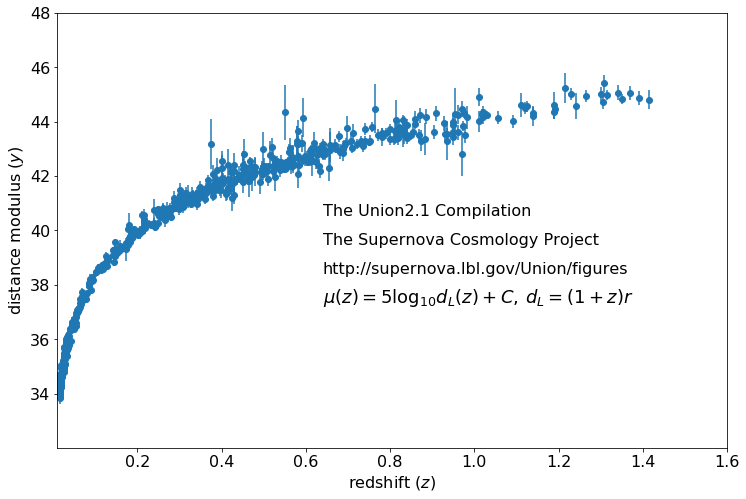

In [14]:
plotData(data, 'SCP_data.png' )

### Create probability model
We assume a Gaussian probability density function (pdf),

$$f(y \, | \, z, \sigma, \theta) = \textrm{Gauss}(y, \mu(z, \theta), \sigma),$$

where $\theta$ are the parameters of the cosmological model. Neglecting correlations amongst the data, the likelihood of the data is

$$p(y \,| \, z, \sigma, \theta) = \prod_{i=1}^N \, f(y_i \, | \, z_i, \sigma_i, \theta),$$

with $N = 580$. For a Bayesian calculation, we would, in addition, need to specify a prior density $\pi(\theta)$ for the cosmological parameters. We assume that $z_i$ and $\sigma_i$ are known with negligible uncertainty.

In [15]:
def createModel(wspace, arguments):
    #--------------------------------------------------------------    
    # create distance modulus expression
    # "mu".
    # note use of compiled C++ program
    # for expressions that are too
    # complicated to be written inline
    #--------------------------------------------------------------
    print("create model")
    set_arguments = wspace.set('set_arguments')
    cmd = 'distanceModulus(%s)' % arguments
    print(cmd)
    
    mu  = ROOT.RooFormulaVar('mu', '#mu', cmd, 
                             ROOT.RooArgList(set_arguments))
    
    # import the "mu" expression into workspace
    getattr(wspace,'import')(mu)

    # finally, create probability model
    wspace.factory('Gaussian::model(y, mu, dy)')
    wspace.Print()

In [16]:
createModel(wspace, arguments)

create model
distanceModulus(z,OM,OL,H0,n)

RooWorkspace(Type1a) Type1a contents

variables
---------
(H0,OL,OM,dy,n,y,z)

p.d.f.s
-------
RooGaussian::model[ x=y mean=mu sigma=dy ] = 0.601823

functions
--------
RooFormulaVar::mu[ actualVars=(z,OM,OL,H0,n) formula="distanceModulus(z,OM,OL,H0,n)" ] = 42.7578

datasets
--------
RooDataSet::data(z,y,dy)

named sets
----------
set_arguments:(z,OM,OL,H0,n)
set_data:(z,y,dy)



### Save workspace to a ROOT file 

In [17]:
filename = '%s_workspace.root' % MODEL
if wspace.writeToFile(filename) != 0:
    print("** problem saveing workspace to ROOT file %s" % filename)

## 2: Perform Fit

Ordinarily, this part would be performed in a separate session, which would require loading the workspace back into memory as follows:

```python
filename = '%s_workspace.root' % MODEL
rfile = TFile(filename)
if not rfile.IsOpen():
    sys.exit("** can't open file %s" % filename)

name = 'Type1a'
wspace = rfile.Get(name)
if wspace == None:
    sys.exit("** can't get workspace %s from file %s"%(name, 
                                                       filename))
```

However, we shall just continue with the workspace already in memory.

In [18]:
def performFit(wspace, params, printLevel=-1):
    sep = "-"*72
    print(sep)
    print("performing fit...")
    swatch = ROOT.TStopwatch()
    swatch.Start()

    # save results of fit to results
    ROOT.RooMsgService.instance().setGlobalKillBelow(ROOT.RooFit.FATAL)
    
    r = wspace.pdf('model').fitTo(wspace.data('data'),
                                  ROOT.RooFit.Save(),
                                  ROOT.RooFit.PrintLevel(printLevel))
    print("real time: %10.3f s" % swatch.RealTime())
    print(sep)
    r.Print()
    print(sep)

    results = []
    npar = 0
    for p in params:
        free, name = p[:2]
        results.append((wspace.var(name).getVal(), 
                        wspace.var(name).getError()))
        if free: npar += 1
    return (results, npar)

In [19]:
results, npar = performFit(wspace, params)

------------------------------------------------------------------------
performing fit...
real time:      5.064 s
------------------------------------------------------------------------
------------------------------------------------------------------------

  RooFitResult: minimized FCN value: 1484.31, estimated distance to minimum: 8.83975e-10
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=0 HESSE=0 

    Floating Parameter    FinalValue +/-  Error   
  --------------------  --------------------------
                    H0    7.0427e+01 +/-  4.53e-01
                     n    2.8229e+00 +/-  1.87e-01



## Plot Results

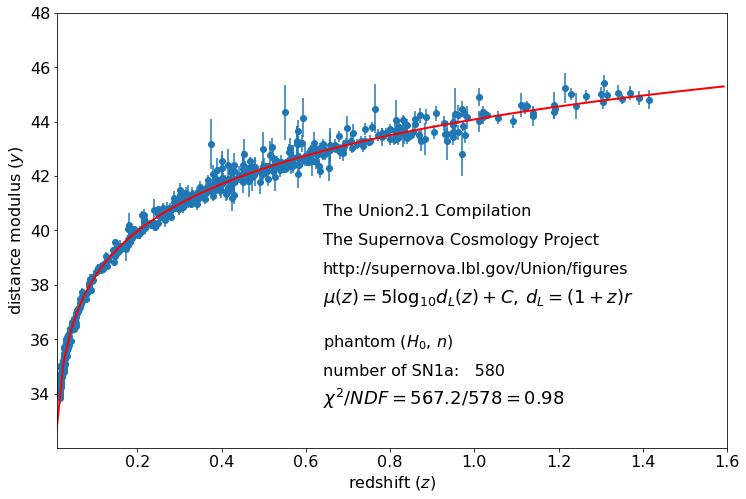

In [20]:
plotData(data, 'SCP_fit_%s.png' % MODEL, 
         [MODEL, title, results, npar])